<a href="https://colab.research.google.com/github/PatrykCiwinski/Project_CNN/blob/main/CNN_beverages_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
from matplotlib.image import imread
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random

In [2]:
data_dir = '/content/drive/MyDrive/alkohole/data'

In [3]:
os.listdir(data_dir)

['train', 'test']

In [4]:
train_path=data_dir+'/train/'
test_path=data_dir+'/test/'

In [5]:
train_path

'/content/drive/MyDrive/alkohole/data/train/'

In [6]:
bezalko_train_first = train_path+'bezalkoholowe/'+os.listdir(train_path+'/bezalkoholowe')[0]

In [7]:
bezalko_train_first

'/content/drive/MyDrive/alkohole/data/train/bezalkoholowe/bracia-sadownicy-tloczone-jablko-i-agrestem-250-ml.jpg'

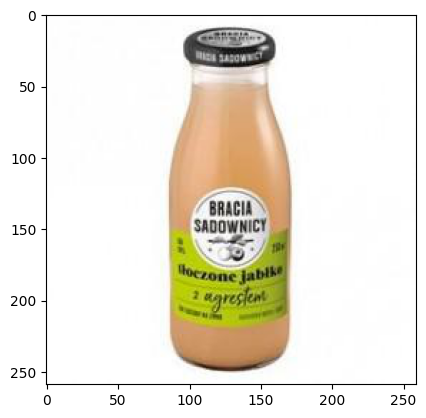

In [8]:
plt.imshow(imread(bezalko_train_first));

In [9]:
wysoko_train_first = train_path+'wysokoprocentowe/'+os.listdir(train_path+'/wysokoprocentowe')[0]

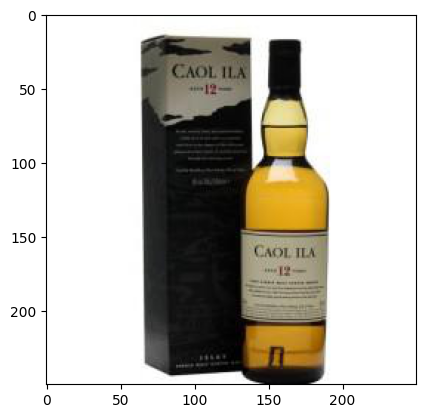

In [10]:
plt.imshow(imread(wysoko_train_first));

In [37]:
data_path = '/content/drive/MyDrive/alkohole/data'
os.makedirs(data_path + '/test', exist_ok=True)
test_size = 0.2

for subcategory in ['bezalkoholowe', 'średnioprocentowe','wysokoprocentowe']:
  os.makedirs(data_path + '/test/' + subcategory, exist_ok=True)
  file_list = os.listdir(data_path + '/train/' + subcategory)
  number_of_samples = int(len(file_list) * test_size)
  for file_name in random.sample(file_list, number_of_samples):
    os.rename(data_path + '/train/' + subcategory + '/' + file_name,
              data_path + '/test/' + subcategory + '/' + file_name)

In [11]:
len(os.listdir(train_path + '/bezalkoholowe'))

429

In [12]:
dim1 = []
dim2 = []

for image_name in os.listdir(test_path+'/bezalkoholowe'):
    img = imread(test_path+'/bezalkoholowe/'+image_name)
    d1,d2,colors = img.shape
    dim1.append(d1)
    dim2.append(d2)

In [13]:
img_w = int(np.mean(dim1)//1)

In [14]:
img_h = int(np.mean(dim2)//1)

In [15]:
image_shape = (img_h,img_w,3)

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [17]:
image_gen = ImageDataGenerator()

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

In [19]:
model = Sequential()


model.add(layers.Conv2D(filters=64,kernel_size=(3,3),input_shape=image_shape,activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

model.add(layers.Flatten())

model.add(layers.Dense(128))
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(3,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 257, 257, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 128)     73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 63, 63, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 61, 61, 128)       147584    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 128)      0

In [21]:
from tensorflow.keras.callbacks import EarlyStopping

In [22]:
es = EarlyStopping(monitor='val_accuracy',patience=3)
batch_size = 16

In [23]:
train_image = image_gen.flow_from_directory(train_path,target_size=image_shape[:2],
                                           color_mode='rgb',
                                           batch_size=batch_size,
                                           class_mode='categorical')

Found 965 images belonging to 3 classes.


In [24]:
test_image = image_gen.flow_from_directory(test_path,target_size=image_shape[:2],
                                           color_mode='rgb',
                                           batch_size=batch_size,
                                           class_mode='categorical',
                                          shuffle=False)

Found 295 images belonging to 3 classes.


In [25]:
history = model.fit(train_image, epochs=10,validation_data=test_image,
                    callbacks=[es])

Epoch 1/10
61/61 [==============================] - 13s 124ms/step - loss: 51.1399 - accuracy: 0.5979 - val_loss: 0.7665 - val_accuracy: 0.7695
Epoch 2/10
61/61 [==============================] - 5s 85ms/step - loss: 0.7792 - accuracy: 0.7275 - val_loss: 0.6847 - val_accuracy: 0.6983
Epoch 3/10
61/61 [==============================] - 6s 93ms/step - loss: 0.6239 - accuracy: 0.7865 - val_loss: 0.5448 - val_accuracy: 0.8441
Epoch 4/10
61/61 [==============================] - 5s 86ms/step - loss: 0.4545 - accuracy: 0.8404 - val_loss: 0.5421 - val_accuracy: 0.8407
Epoch 5/10
61/61 [==============================] - 6s 103ms/step - loss: 0.3670 - accuracy: 0.8798 - val_loss: 0.7572 - val_accuracy: 0.7085
Epoch 6/10
61/61 [==============================] - 5s 86ms/step - loss: 0.4752 - accuracy: 0.8269 - val_loss: 0.7826 - val_accuracy: 0.8475
Epoch 7/10
61/61 [==============================] - 6s 95ms/step - loss: 0.3198 - accuracy: 0.8953 - val_loss: 0.7099 - val_accuracy: 0.8678
Epoch 8/1

In [26]:
result = pd.DataFrame(history.history)

<Axes: >

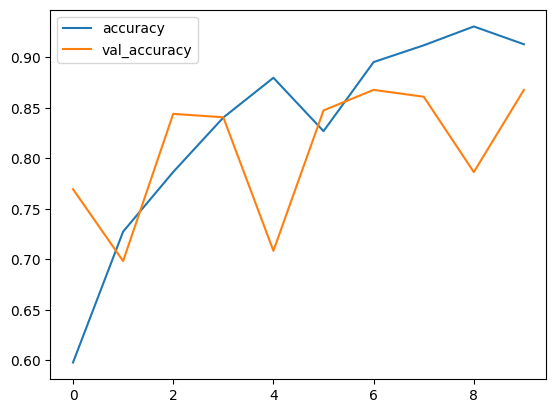

In [27]:
result[['accuracy','val_accuracy']].plot()

<Axes: >

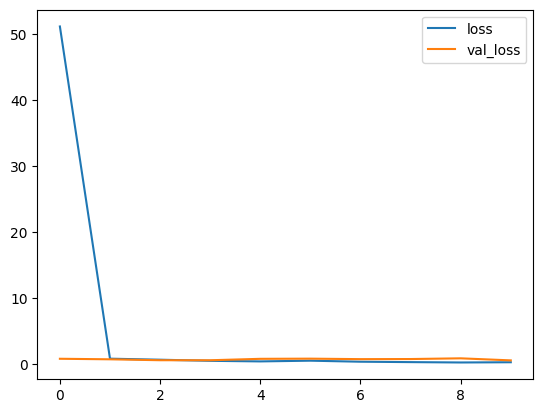

In [28]:
result[['loss','val_loss']].plot()

In [29]:
from sklearn.metrics import classification_report

In [30]:
predict = model.predict(test_image)

19/19 [==============================] - 1s 64ms/step


In [31]:
predictions=np.argmax(predict,axis=1)

In [32]:
print(classification_report(test_image.classes,predictions))

              precision    recall  f1-score   support

           0       0.78      0.95      0.86       103
           1       0.95      0.95      0.95        73
           2       0.92      0.75      0.82       119

    accuracy                           0.87       295
   macro avg       0.88      0.88      0.88       295
weighted avg       0.88      0.87      0.87       295



In [33]:
from tensorflow.keras.preprocessing import image

In [35]:
my_image = image.load_img('/content/drive/MyDrive/alkohole/data/test/wysokoprocentowe/gin-tanqueray-flor-de-sevilla-07l-413.jpg',target_size=image_shape)

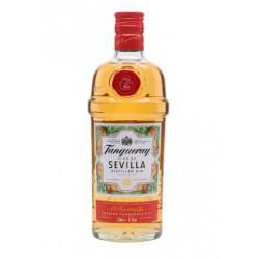

In [36]:
my_image

In [37]:
my_image = image.img_to_array(my_image)

In [38]:
my_image = np.expand_dims(my_image, axis=0)

In [39]:
my_image.shape

(1, 259, 259, 3)

In [40]:
pred_img=model.predict(my_image)

1/1 [==============================] - 1s 869ms/step


In [41]:
prediction_img=np.argmax(pred_img,axis=1)

In [42]:
prediction_img

array([2])

In [43]:
test_image.class_indices

{'bezalkoholowe': 0, 'średnioprocentowe': 1, 'wysokoprocentowe': 2}